# Part2

### Recommender systems

#### Item similarity based Recommender systems

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
df = pd.read_csv("19-Recommender-Systems/u.data", sep = '\t', names = column_names)

In [5]:
#df here is movies head datasets
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles = pd.read_csv('19-Recommender-Systems/Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df, movie_titles, on = 'item_id')

In [9]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
sns.set_style('white')

In [13]:
%matplotlib inline

The next thing is to find mean average ratings based on movie titles. 

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

We need to keep in mind that some of this movies ratings happens to be by just one or two people

We can title based on ratings and count as shown below:

In [26]:
df.pivot_table(index = 'title', values = 'rating', aggfunc=['count','mean']).\
sort_values(by = [('count', 'rating'), ('mean', 'rating')], ascending = False).head(20)

,count,mean
,rating,rating
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
"English Patient, The (1996)",481,3.656965
Scream (1996),478,3.441423
Toy Story (1995),452,3.878319


Star Wars has the highest number of votes from this dataset. 

In [32]:
ratings = df.pivot_table(index = 'title', values = 'rating', aggfunc=['count','mean']).\
sort_values(by = [('count', 'rating'), ('mean', 'rating')], ascending = False)

In [33]:
ratings.head()

,count,mean
,rating,rating
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701


In [35]:
ratings.columns.levels[0]

Index(['count', 'mean'], dtype='object')

Rename columns and drop a level in column names 

In [37]:
ratings = ratings.rename(columns = {'count': 'Num_of_ratings', 'mean' : 'average_rating'})

In [40]:
ratings = ratings.droplevel(1, axis = 'columns')

In [41]:
ratings.head()

,Num_of_ratings,average_rating
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701


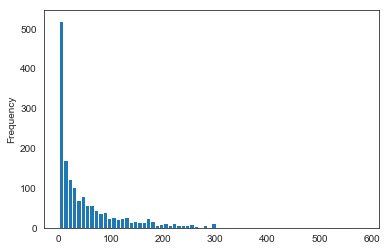

In [44]:
ratings['Num_of_ratings'].plot(kind = 'hist', bins = 70)

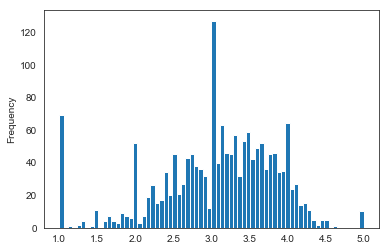

In [45]:
ratings['average_rating'].plot(kind = 'hist', bins = 70)

From the plot, most of the movies are kinda distributed normally around 3 to 4 stars. 

There are few outliers in both 1 and 5 stars. We can also check the relatioship between the two columns **number_of_ratings** and **average_rating**

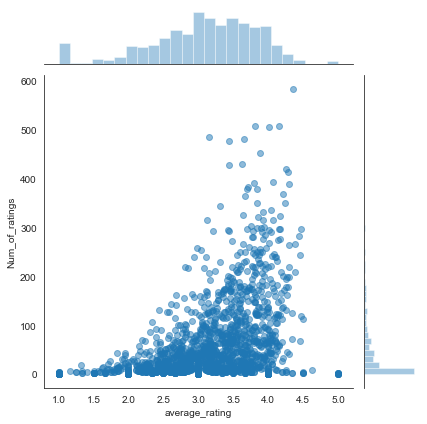

In [47]:
sns.jointplot(data = ratings, x = 'average_rating', y = 'Num_of_ratings', alpha = 0.5)

From the graph, you have more number of ratings as the average rating increases

In [49]:
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [51]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
ratings.sort_values('Num_of_ratings', ascending = False).head(10)

,Num_of_ratings,average_rating
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
"English Patient, The (1996)",481,3.656965
Scream (1996),478,3.441423
Toy Story (1995),452,3.878319
Air Force One (1997),431,3.631090


For the next illustration, we are going to be using the movies ```star wars (1977)``` and ```Liar Liar (1997)```

In [53]:
star_war_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [54]:
star_war_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

* The next question is to find how star war ratings are correlated with other ratings in the dataframe 

In [56]:
#corrwith provides correlation between two columns in datraframes
similar_to_starwars = moviemat.corrwith(star_war_user_ratings)

In [57]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/martloni/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/martloni/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [59]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [71]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [72]:
# Drop any na values within the dataframe
corr_starwars = pd.DataFrame(similar_to_starwars.dropna(), columns = ['Correlation'])

In [73]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [74]:
corr_starwars.isna().sum()

Correlation    0
dtype: int64

In [75]:
corr_starwars = corr_starwars.join(ratings['Num_of_ratings'])

In [76]:
corr_starwars.head()

,Correlation,Num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


We need to filter the dataframe to remove ratings less than 100

In [80]:
corr_starwars[corr_starwars['Num_of_ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,Num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


You can see from the table above that there is a high correlation of Star Wars with movies that resemble starwars, and it drops as you get to Austin Powers

In [82]:
corr_liarliar = pd.DataFrame(similar_to_liarliar.dropna(), columns = ['Correlation'])

In [83]:
corr_liarliar = corr_liarliar.join(ratings['Num_of_ratings'])

In [84]:
corr_liarliar[corr_liarliar['Num_of_ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,Num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


#### Conclusion : By using recommendation system here, we are able to provide how one movie relates to another based on its correlation value 

# Natural Language Processing Theory

In [85]:
import nltk

In [89]:
# Download datasets
#nltk.download_shell()

In [91]:
messages = [line.rstrip() for line in open('20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [92]:
print(len(messages))

5574


In [93]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [94]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [95]:
messages = pd.read_csv('20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [96]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [99]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [100]:
messages['length'] = messages['message'].apply(len)

In [101]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


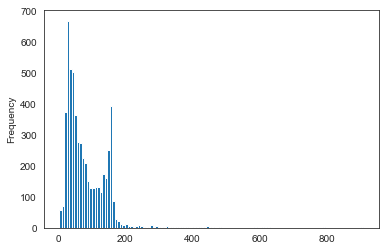

In [106]:
messages['length'].plot(kind = 'hist', bins = 120)

In [108]:
messages['length'].nlargest(10)

1085    910
1863    790
2434    629
1579    611
2158    588
2849    588
2380    482
3017    461
1513    458
2370    446
Name: length, dtype: int64

In [111]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a5a00f0>,
      dtype=object)

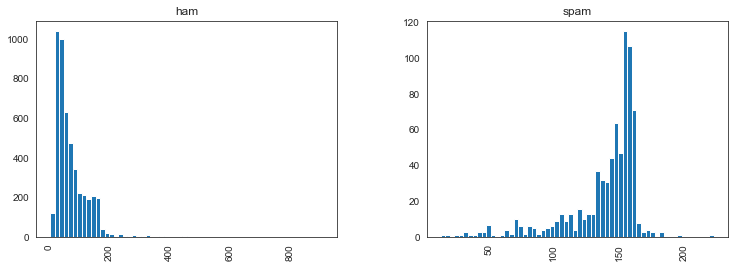

In [113]:
# This is an example of Pandas own form of Facetgrid

messages.hist(column = 'length', by = 'label', bins = 60, figsize = (12, 4))

In [114]:
import string

In [116]:
#sample message
mess = 'Sample message! Notice: It has punctuation'

In [119]:
nopunc = [c for c in mess if c not in string.punctuation]

In [120]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [121]:
from nltk.corpus import stopwords

In [123]:
# The stopwords are common words that don't really tell you any distinguishing features. 
stopwords.words('english')[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [124]:
nopunc = ''.join(nopunc)

In [125]:
nopunc

'Sample message Notice It has punctuation'

In [126]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [127]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [128]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [133]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    2. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
    

In [131]:
#The process described above is catext_processd tokenization. This is the act of removing common text strings from list of strings in order to get a 'cleaner' version of the string

In [134]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [135]:
# Vectorization of the token list

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [141]:
print(len(bow_transformer.vocabulary_))

11425


In [142]:
mess4 = messages['message'][3]

In [144]:
print(mess4)

U dun say so early hor... U c already then say...


In [145]:
bow4 = bow_transformer.transform([mess4])

In [147]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [149]:
#Both top and bottom words appear twice
#11425 columns

In [148]:
print(bow4.shape) 


(1, 11425)


In [151]:
bow_transformer.get_feature_names()[9554]

'say'

In [152]:
bow_transformer.get_feature_names()[4068]

'U'

In [154]:
messages_bow = bow_transformer.transform(messages['message'])

In [155]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [156]:
#5572 rows and 11425 columns

In [157]:
#Getting non-zero occurences
messages_bow.nnz

50548

In [160]:
#Sparsity gives how many zeros there are in our matrix
sparsity = (100.0 * messages_bow.nnz/ (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.07940295412668218


In [161]:
from sklearn.feature_extraction.text import TfidfTransformer

In [165]:
#tfidf means term frequency inverse documnent frequency
tfidf_transform = TfidfTransformer().fit(messages_bow)

In [166]:
tfidf4 = tfidf_transform.transform(bow4)

In [167]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [168]:
tfidf_transform.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [169]:
messages_tfidf = tfidf_transform.transform(messages_bow)

In [170]:
from sklearn.naive_bayes import MultinomialNB

In [171]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [173]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [174]:
messages['label'][3]

'ham'

In [175]:
#Prediction is correct

In [177]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [179]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Using train test split

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [184]:
from sklearn.pipeline import Pipeline

In [185]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB())
])

In [186]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a2980f6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [187]:
predictions = pipeline.predict(msg_test)

In [188]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1447
        spam       1.00      0.75      0.85       225

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672



### Project

In [190]:
yelp = pd.read_csv('20-Natural-Language-Processing/yelp.csv')

In [191]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [192]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [193]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [194]:
yelp['text_length'] = yelp['text'].apply(len)

In [195]:
yelp['text_length'].head()

0     889
1    1345
2      76
3     419
4     469
Name: text_length, dtype: int64

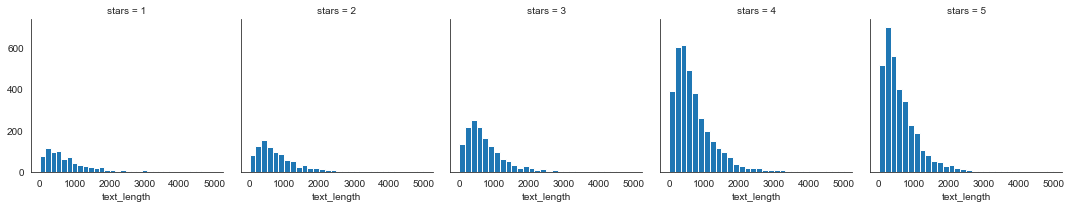

In [206]:
g = sns.FacetGrid(yelp, col = 'stars', margin_titles=True)
g.map(plt.hist, 'text_length', bins = 30)

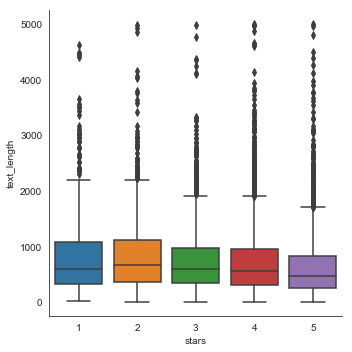

In [207]:
sns.catplot(x= 'stars', y = 'text_length', data = yelp, kind = 'box')

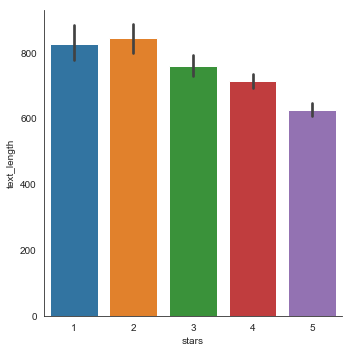

In [209]:
sns.catplot(x= 'stars', y = 'text_length', data = yelp, kind = 'bar')

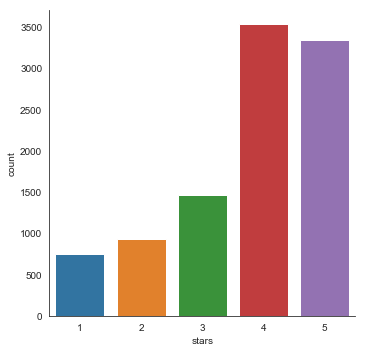

In [210]:
sns.catplot(x= 'stars', data = yelp, kind = 'count')

In [215]:
yelp.groupby('stars')[['cool', 'useful', 'funny', 'text_length']].mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [222]:
yelp_corr= yelp.drop('stars', axis = 'columns').corr()

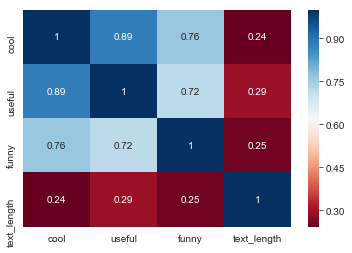

In [223]:
sns.heatmap(yelp_corr, annot = True, cmap = 'RdBu' )

## NLP Classification

In [226]:
yelp_new_df = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [227]:
X = yelp_new_df['text']
y = yelp_new_df['stars']

In [228]:
from sklearn.feature_extraction.text import CountVectorizer

In [229]:
vectorizer = CountVectorizer()

In [231]:
X = vectorizer.fit_transform(X)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [233]:
from sklearn.naive_bayes import MultinomialNB

In [234]:
nb = MultinomialNB()

In [235]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [236]:
pred = nb.predict(X_test)

In [237]:
from sklearn.metrics import classification_report, confusion_matrix

In [238]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


### Using Text Processing TFID

In [239]:
from sklearn.feature_extraction.text import TfidfTransformer

In [240]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('nb', MultinomialNB())
])

In [247]:
X = yelp_new_df['text']
y = yelp_new_df['stars']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [250]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a2980f6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [251]:
y_pred = pipeline.predict(X_test)

In [252]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]
